# STATISTIK COVID 19 INDONESIA
MUHAMMAD HANIF SUYUTHI

**DATA SET YANG DIGUNAKAN**

*https://www.kaggle.com/datasets/hendratno/covid19-indonesia*

**Dashboard Looker**

*https://lookerstudio.google.com/reporting/2f50c90c-fe11-457c-b861-c640b31a58c7*


# DESKRIPSI


## Latar Belakang
Kita adalah data analis suatu oraganisasi kesehatan yang ditugaskan untuk menganalisis data covid di Indonesia. Data ini akan dijadikan acuan ketika nantinya terjadi wabah baru seperti covid.

## Objectif
Menganalisa tren penyebaran Covid di Indonesia dan pengaruh kepadatan penduduk terhadap total kasus baru di daerah-daerah

## Problem Statement
- Bagaimanakah tren penyebaran covid di Indonesia
- Berapa kontribusi tiap propinsi terhadap kasus Covid di Indonesia
- Bagaimanakah total kasus, kematian, dan kesembuhan baru di tiap propinsi
- Apakah faktor area dan populasi mempengaruhi total kasus baru di tiap daerah
- Berapakah nilai korelasi antara total kasus baru dengan kepadatan penduduk di daerah
- Apakah ada perbedaan signifikan pada jumlah kasus Covid pada tahun 2021 dengan tahun 2022

# AREA KERJA

## IMPOR PUSTAKA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # digunakan pada uji analisis
from scipy.stats import t # untuk t-value

## MEMUAT DAN EKSPLORASI DATA

Dataset berasal dari https://www.kaggle.com/datasets/hendratno/covid19-indonesia

In [3]:
#MEMUAT DATA

#df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

df = pd.read_csv('/content/drive/MyDrive/Hacktiv8/covid_19_indonesia_time_series_all.csv')


Kita akan melihat jumlah kolom dan nilai NaN pada tiap kolom dengan menggunakan .info()

Kolom yang tidak kita butuhkan akan kita drop dan nilai NaN yang ada akan kita hapus atau ganti nilainya di proses pembersihan Data

In [4]:
#MELIHAT INFO KOLOM, BARIS DAN NILAI NAN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Berdasarkan indo data, terlihat ada kolom yang memiliki nilai Nan semua dan ada kolom yang memiliki sedikit nilai Nan.

Terlihat juga kolom yang tidak kita butuhkan seperti kolom "longitude", "latitude", dan "spesial status".

In [5]:
#MELIHAT DESKRIPSI DATA 
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


Kita akan melihat lima baris data awal dan data akhir

In [6]:
# MELIHAT LIMA BARIS AWAL DATA
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [7]:
# MELIHAT LIMA BARIS AKHIR DATA
df.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


Dari melihat data awal dan akhir terlihat bahwa kolom Location ISO Code berisi kode untuk tiap propinsi dan negara.

Kita akan memisahkan antara data propinsi dan negara untuk membedakan penyebaran secara keseluruhan (Indonesia) dan tiap daerah.

In [8]:
#MENCARI JUMLAH NILAI UNIK DI KOLOM 'Location ISO Code'
df['Location ISO Code'].nunique()

35

Dari jumlah data unik terlihat bahwa nilai unik pada kolom 'Location ISO Code' adalah 35 yang berarti nilai ini adalah 34 nilai propopinsi dan 1 nilai negara (Indonesia)

## PEMBERSIHAN DATA DAN PEMISAHAN DATA

Pertama kita akan menghapus kolom yang tidak kita butuhkan. Karena kita ingin melihat kenaikan kasus baru dan kepadatan penduduk tiap daerah yang ada di Indonesia maka kita akan menghapus tabel yang tidak berhubungan dengan hal tersebut.

In [9]:
df_new= df.drop(columns=['Location Level', 'Longitude', 'Latitude', 'Country', 'Continent', 'Province'])
df_new

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,16334.31,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,16334.31,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,69.80,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,16334.31,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,190.17,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,131.37,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,89.72,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,203.82,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


Kemudian kita drop kolom yang memiliki nilai NaN

In [10]:
# Menghapus Kolom yang Memiliki Nilai NaN
df = df_new.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      31822 non-null  object 
 1   Location ISO Code         31822 non-null  object 
 2   Location                  31822 non-null  object 
 3   New Cases                 31822 non-null  int64  
 4   New Deaths                31822 non-null  int64  
 5   New Recovered             31822 non-null  int64  
 6   New Active Cases          31822 non-null  int64  
 7   Total Cases               31822 non-null  int64  
 8   Total Deaths              31822 non-null  int64  
 9   Total Recovered           31822 non-null  int64  
 10  Total Active Cases        31822 non-null  int64  
 11  Total Regencies           31822 non-null  int64  
 12  Total Districts           31822 non-null  int64  
 13  Area (km2)                31822 non-null  int64  
 14  Popula

In [11]:
#Membuat Kolom Hari, Bulan, dan Tahun 
df['date'] = df['Date'].apply(pd.to_datetime, format='%m/%d/%Y')
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day


<ipython-input-11-1f35772d5201>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['Date'].apply(pd.to_datetime, format='%m/%d/%Y')
<ipython-input-11-1f35772d5201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['date']).year
<ipython-input-11-1f35772d5201>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Karena kita ingin melihat tren kasus baru di indonesia dan di tiap daerah maka kita akan memfilter data kita menjadi dua, yang memiliki kolom iso kode IDN dan yang tidak memiliki kode iso IDN. 

In [13]:
#Mengunduh DataFrame untuk Dashboard
df.to_csv("Covid IDN.csv", index=False) 

In [14]:
#MENGAMBIL DATA COVID INDONESIA
df_idn = df[df['Location ISO Code'] == 'IDN'].reset_index()
df_idn

,index,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,...,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,date,year,month,day
0,2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,...,0.01,0.00,0.00,0.00,0.00%,0.00%,2020-03-02,2020,3,2
1,5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,...,0.01,0.00,0.00,0.00,0.00%,0.00%,2020-03-03,2020,3,3
2,9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,...,0.01,0.00,0.00,0.00,0.00%,0.00%,2020-03-04,2020,3,4
3,13,3/5/2020,IDN,Indonesia,0,0,0,0,2,0,...,0.01,0.00,0.00,0.00,0.00%,0.00%,2020-03-05,2020,3,5
4,18,3/6/2020,IDN,Indonesia,2,0,0,2,4,0,...,0.02,0.00,0.00,0.00,0.00%,0.00%,2020-03-06,2020,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,31690,9/12/2022,IDN,Indonesia,1848,17,3465,-1634,6394340,157787,...,24112.70,0.06,595.01,59.50,2.47%,97.03%,2022-09-12,2022,9,12
925,31725,9/13/2022,IDN,Indonesia,2896,20,3617,-741,6397236,157807,...,24123.62,0.08,595.08,59.51,2.47%,97.04%,2022-09-13,2022,9,13
926,31760,9/14/2022,IDN,Indonesia,2799,21,3938,-1160,6400035,157828,...,24134.18,0.08,595.16,59.52,2.47%,97.06%,2022-09-14,2022,9,14
927,31794,9/15/2022,IDN,Indonesia,2651,21,3915,-1285,6402686,157849,...,24144.18,0.08,595.24,59.52,2.47%,97.08%,2022-09-15,2022,9,15


In [15]:
#MENGAMBIL DATA COVID TIAP DAERAH DI INDONESIA
df_prov = df[df['Location ISO Code'] != 'IDN'].reset_index()
df_prov

,index,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,...,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,date,year,month,day
0,0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,...,3.60,0.00,1.84,0.18,51.28%,192.31%,2020-03-01,2020,3,1
1,1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,...,3.78,0.00,1.84,0.18,48.78%,182.93%,2020-03-02,2020,3,2
2,3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,...,0.16,0.00,0.00,0.00,0.00%,100.00%,2020-03-02,2020,3,2
3,4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,...,3.96,0.00,1.84,0.18,46.51%,174.42%,2020-03-03,2020,3,3
4,6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,...,0.02,0.02,0.02,0.00,100.00%,6000.00%,2020-03-03,2020,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30888,31816,9/15/2022,ID-SG,Sulawesi Tenggara,2,0,0,2,25693,569,...,9748.96,0.00,215.90,21.59,2.21%,97.65%,2022-09-15,2022,9,15
30889,31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,...,19974.38,0.00,459.14,45.91,2.30%,96.64%,2022-09-15,2022,9,15
30890,31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,...,18959.11,0.00,429.59,42.96,2.27%,97.54%,2022-09-15,2022,9,15
30891,31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,...,10002.74,0.00,410.83,41.08,4.11%,95.51%,2022-09-15,2022,9,15


## VISUALISASI DATA

### Tren Kasus Covid di Indonesia

Pertama kita ingin melihat tren kasus baru covid tiap bulan pada tahun 2021-2022

<Axes: xlabel='month', ylabel='New Cases'>

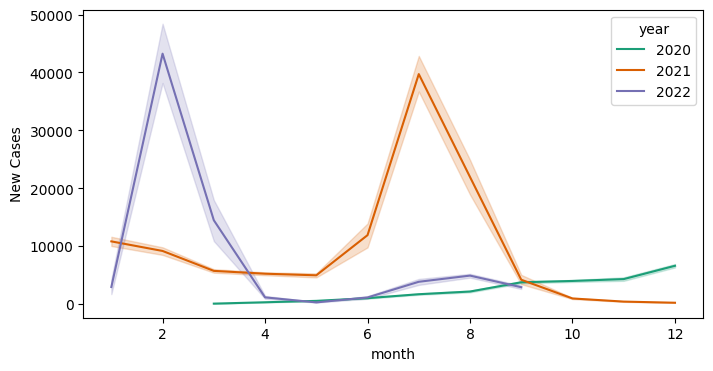

In [16]:
#Mengurutkan Nilai Bulan
dfI_01 = df_idn.sort_values('month', ascending=False)

#Plot Grafik
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x="month", y="New Cases", data=dfI_01, hue="year", palette="Dark2")

Dari hasil grafik menunjukan bahwa tidak ada bulan-bulan tertentu dimana kasus baru covid naik maupun turun.   

Selanjutnya kita akan melihat kasus baru, kesembuhan baru, dan kematian baru pada Data

Sebelum kita membuat grafiknya, kita harus mentransformasikan dataframe kita. Transformasi ini menggunakan .melt().

Data yang baru berisi kolom baru, 'status' yang berisi nilai variabel 'New Cases', 'New Recovered', dan 'New Deaths' dan 'jumlah_status' yang berisi nilai pada kolom 'New Cases', 'New Recovered', 'New Deaths' pada data yang lama


In [17]:
# Melting Data
df01 = dfI_01.loc[:, ['date', 'New Cases', 'New Recovered', 'New Deaths']]
df01n = pd.melt(df01, id_vars="date", var_name="status", value_name="jumlah_status")

(array([18353., 18444., 18536., 18628., 18718., 18809., 18901., 18993.,
        19083., 19174., 19266.]),
 [Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

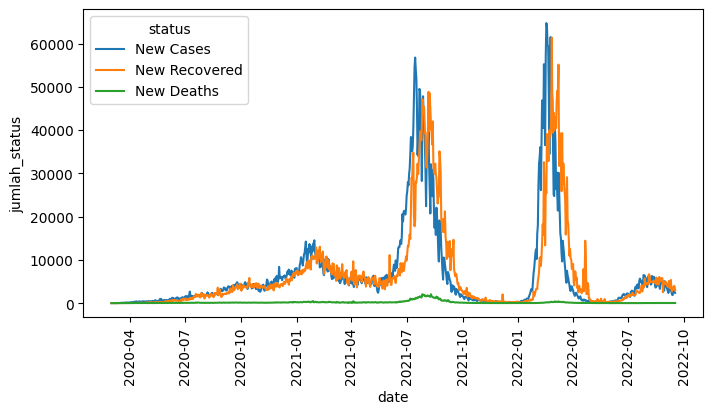

In [18]:
# Plot Grafik 
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(data=df01n, x="date", y="jumlah_status", hue="status")
plt.xticks(rotation=90)

Dari grafik terlihat bahwa kasus kenaikan dan penurunan kasus baru selalu diikuti dengan kenaikan dan penurunan kesembuhan baru. Terihat juga kematian baru sempat naik saat kenaikan kasus baru pada tahun 2021 tapi tidak terlalu naik saat kenaikan kasus baru pada tahun 2022

### Persentase Total Kasus Baru Tiap Daerah Terhadap Total Kasus Baru Seluruh Daerah

Pada proses ini kita akan melihat berapa kontribusi tiap daerah terhadap total kasus covid keseluruhan 

In [36]:
#Mengambil Data yang Dibutuhkan
df_NC = df_prov.groupby(['Location', 'Location ISO Code', 'Population Density', 'Area (km2)', 'Population'])['New Cases'].sum().reset_index()
df_NC = df_NC.sort_values('New Cases', ascending=False).reset_index()
df_NC 

,index,Location,Location ISO Code,Population Density,Area (km2),Population,New Cases
0,4,DKI Jakarta,ID-JK,16334.31,664,10846145,1412474
1,8,Jawa Barat,ID-JB,1276.55,35378,45161325,1173731
2,9,Jawa Tengah,ID-JT,1108.64,32801,36364072,636409
3,10,Jawa Timur,ID-JI,846.78,47803,40479023,601534
4,2,Banten,ID-BT,1109.64,9663,10722374,333875
5,5,Daerah Istimewa Yogyakarta,ID-YO,1158.90,3133,3631015,224307
6,14,Kalimantan Timur,ID-KI,27.52,129067,3552191,209017
7,1,Bali,ID-BA,729.43,5780,4216171,166831
8,33,Sumatera Utara,ID-SU,203.82,72981,14874889,158866
9,25,Riau,ID-RI,69.80,87024,6074100,152648


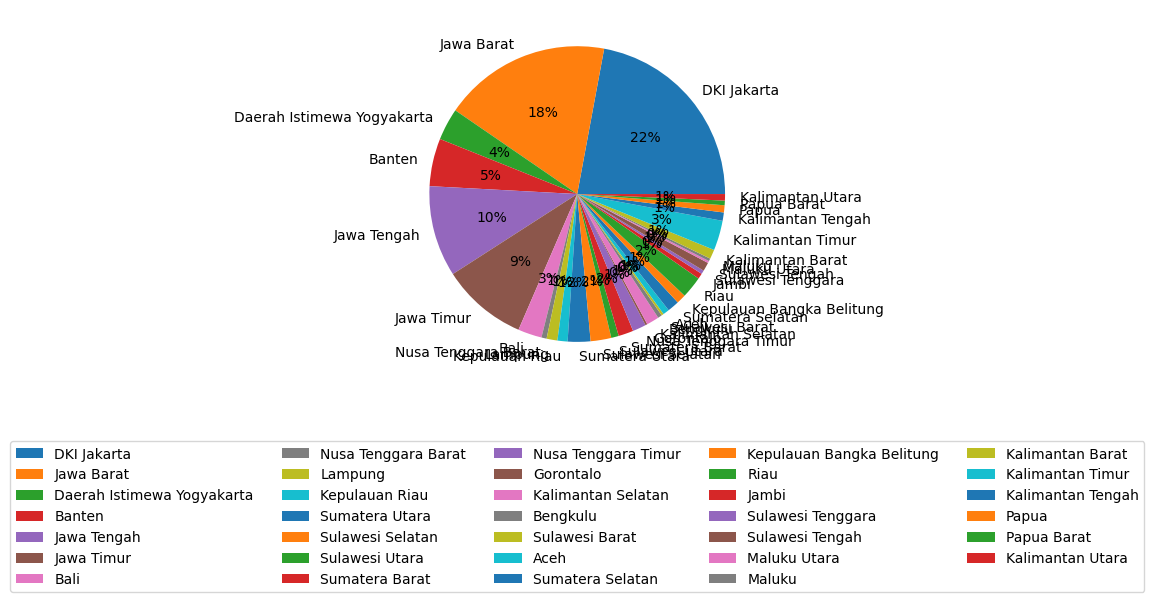

In [34]:
# Plot Grafik
plt.pie(df_NC['New Cases'], labels=df_NC['Location'], autopct='%.0f%%')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()

Dari grafik terlihat bahwa daerah di Pulau Jawa memiliki hampir 70% kontribusi terhadap total kasus baru keseluruhan daerah di Indonesia 

### Total Kasus Baru, Total Kesembuhan Baru, dan Total Kematian Baru Tiap Daerah

Disini kita akan melihat bagaimana Total Kasus ,Kesembuhan, dan Kematian Baru Tiap Daerah.

Sebelum itu kita harus menjumlahkan tiap kolom yang dibutuhkan dan menggabungkannya ke data yang baru

In [21]:
# Menjumlahkan Kolom yang Dibutuhkan 
dfPNC=df_prov.groupby(['Location ISO Code'])['New Cases'].sum().reset_index()
dfPR=df_prov.groupby(['Location ISO Code'])['New Recovered'].sum().reset_index()
dfPD=df_prov.groupby(['Location ISO Code'])['New Deaths'].sum().reset_index()

# Menggabungkan Data 
df03 = pd.merge(pd.merge(dfPNC, dfPR, on='Location ISO Code'), dfPD, on='Location ISO Code')

df03

,Location ISO Code,New Cases,New Recovered,New Deaths
0,ID-AC,44038,41712,2223
1,ID-BA,166831,161626,4731
2,ID-BB,66144,64455,1616
3,ID-BE,29173,28617,522
4,ID-BT,333875,328372,2945
5,ID-GO,13951,13433,487
6,ID-JA,38643,37677,889
7,ID-JB,1173731,1144298,15937
8,ID-JI,601534,568666,31732
9,ID-JK,1412474,1386059,15493


Sama seperti Visualisasi Data pertama, kita harus mentransformasikan data hasil gabungan dengan fungsi .melt()

In [22]:
# Transformasi Data
df03n = pd.melt(df03, id_vars="Location ISO Code", var_name="status", value_name="jumlah_status")
df03n

,Location ISO Code,status,jumlah_status
0,ID-AC,New Cases,44038
1,ID-BA,New Cases,166831
2,ID-BB,New Cases,66144
3,ID-BE,New Cases,29173
4,ID-BT,New Cases,333875
...,...,...,...
97,ID-SR,New Deaths,394
98,ID-SS,New Deaths,3376
99,ID-ST,New Deaths,1733
100,ID-SU,New Deaths,3288


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'ID-AC'),
  Text(1, 0, 'ID-BA'),
  Text(2, 0, 'ID-BB'),
  Text(3, 0, 'ID-BE'),
  Text(4, 0, 'ID-BT'),
  Text(5, 0, 'ID-GO'),
  Text(6, 0, 'ID-JA'),
  Text(7, 0, 'ID-JB'),
  Text(8, 0, 'ID-JI'),
  Text(9, 0, 'ID-JK'),
  Text(10, 0, 'ID-JT'),
  Text(11, 0, 'ID-KB'),
  Text(12, 0, 'ID-KI'),
  Text(13, 0, 'ID-KR'),
  Text(14, 0, 'ID-KS'),
  Text(15, 0, 'ID-KT'),
  Text(16, 0, 'ID-KU'),
  Text(17, 0, 'ID-LA'),
  Text(18, 0, 'ID-MA'),
  Text(19, 0, 'ID-MU'),
  Text(20, 0, 'ID-NB'),
  Text(21, 0, 'ID-NT'),
  Text(22, 0, 'ID-PA'),
  Text(23, 0, 'ID-PB'),
  Text(24, 0, 'ID-RI'),
  Text(25, 0, 'ID-SA'),
  Text(26, 0, 'ID-SB'),
  Text(27, 0, 'ID-SG'),
  Text(28, 0, 'ID-SN'),
  Text(29, 0, 'ID-SR'),
  Text(30, 0, 'ID-SS'),
  Text(31, 0, 'ID-ST'),
  Text(32, 0, 'ID-SU'),
  Text(33, 0, 'ID-YO')])

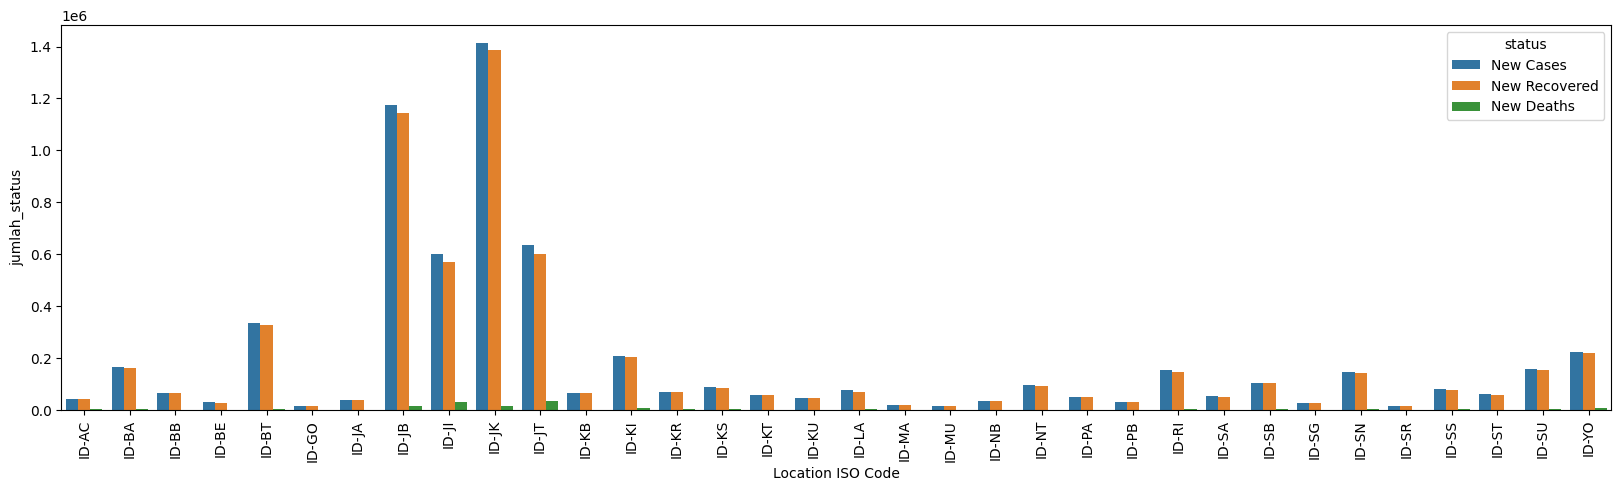

In [23]:
# Plot Grafik
plt.figure(figsize=(20,5))
sns.barplot(x='Location ISO Code', y='jumlah_status', hue='status', data=df03n)
plt.xticks(rotation=90)

Dari grafik terlihat bahwa selisih total kasus baru dengan total kesembuhan baru sangatlah sedikit. Yang menarik, total kematian baru pada daerah berkode JT dan JI melebihi daerah berkode JT padahal daerah berkode JT memiliki total kasus baru yang lebih banyak.

### Total Kasus Baru Terhadap Area dan Populasi

Pada bagian ini kita akan membuat scatter plot yang berkaitan dengan area dan populasi tiap daerah terhadap total kasus baru

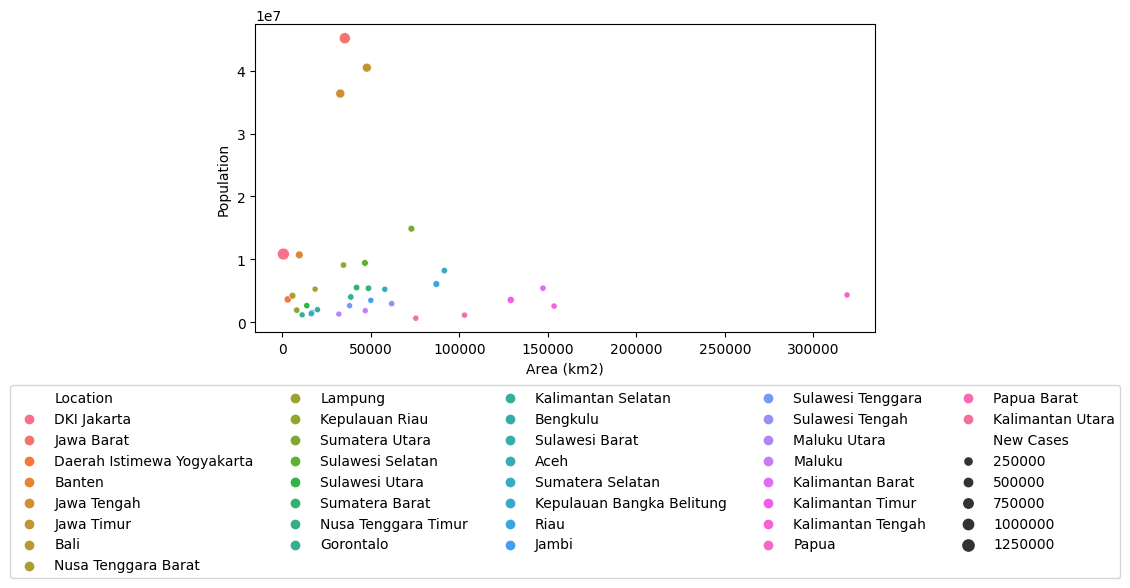

In [24]:
#plot Grafik
fig, ax = plt.subplots(figsize=(8,4))

sns.scatterplot(data=df_NC, x="Area (km2)", y="Population", hue="Location", size = "New Cases", legend='brief')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)



Pada grafik terlihat bahwa daerah yang memiliki populasi < 1 cenderung memiliki total kasus baru yang lebih sedikit dibandinkan dari daerah yang memiliki populasi > 1.

## STATISTIK DESKRIPTIF

Kita akan mencari korelasi antara total kasus baru dengan kepadatan penduduk  pada tiap daerah.

Disini kita akan membandingkan menggunakan .corr()

In [25]:
dfP_NC = df_prov.groupby(['Location', 'Population Density'])['New Cases'].sum().reset_index()

df_NC.corr()

<ipython-input-25-3382083b4371>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_NC.corr()


,Population Density,Area (km2),Population,New Cases
Population Density,1.000000,-0.207281,0.145600,0.755862
Area (km2),-0.207281,1.000000,-0.088913,-0.198261
Population,0.145600,-0.088913,1.000000,0.711036
New Cases,0.755862,-0.198261,0.711036,1.000000


Dari hasil perhitungan, terlihat bahwa kepadatan penduduk memiliki korelasi sebesar 0.755862 dengan total kasus baru tiap daerah. Hal ini menunjukan bahwa kepadatan penduduk memiliki korelasi cukup besar dengan total kasus baru. Dari hasil ini kita dapat menyimpulkan bahwa penanganan dan penccegahan wabah Covid bisa berdasarakan kepadatan penduduk tiap daerah.

## STATISTIK INFERENTIAL

Kita akan melakukan hipotesis Two Samples Independent Two Tailed Hypothesis Testing untuk melihat perbandingan antara kasus tahun 2021 dan tahun 2022


Hipotesa yang dibuat adalah :
- H0: μ_2021 = μ_2022
- H1: μ_2021 != μ_2022

In [26]:
# Memngambil data tahun 2021 dan 2022
dfI_2021 = df_idn[df_idn['year'] == 2021]
dfI_2022 = df_idn[df_idn['year'] == 2022]

In [27]:
# Melakukan uji-t
t_stat, p_val = stats.ttest_ind(dfI_2021["New Cases"], dfI_2022["New Cases"])

# Menampilkan hasil uji-t
print('P-value:', p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:', t_stat)

P-value: 0.1880189490646205
t-statistics: 1.317909984296317



Dari hasil Tes terlihat bahwa P-Value lebih dari 0.05 yang berarti tidak ada perbedaan antara kasus baru pada tahun 2021 dan tahun 2022. Dari hasil ini kita dapat menyimpulkan bahwa usaha pemerintah pada tahun 2021 tidak efektif dalam menekan kasus baru pada tahun 2022

# KESIMPULAN

Dari pengolahan data yang kita lakukan dapat kita simpulkan:
- Tren kenaikan dan penurunan covid di Indonesia tidak tergantung pada bulan-bulan tertentu
- Daerah di Pulau Jawa memiliki kotribusi besar terhadap total kasus baru di Indonesia
- Selisih total kasus baru dengan total kesembuhan baru di tiap daerah sangatlah kecil
- Dibandingkan Area, Populasi tiap daerah sangatlah berpengaruh terhadap total kasus baru
- Kepadatan penduduk memiliki korelasi 75,6% terhadapa total kasus baru di tiap daerah
- Kasus baru pada tahun 2021 dan pada tahun 2022 tidak memiliki perbedaan yang signifikan.

Kesimpulan Umum:

Jika ada wabah baru seperti Covid di Indonesia maka:
- Kita tidak boleh berpatokan terhadap bulan-bulan tertentu
- Kita haruslebih memperhatikan penyebaran dan antisipasinya di daerah yang ada di Pulau Jawa
- Kita juga harus lebih memperhatikan penanganan pasien di daerah Jawa Timur dan Jawa Barat
- Kita juga harus lebih memperhatikan ke daerah yang memiliki populasi yang banyak
- Daerah yang memiliki kepadatan penduduk harus lebih diperhatikan penyebaran wabahnya
- Kita bisa memakai metode pencegahan yang dilakukan pada tahun 2021 dan 2022 
- Kita perlu metode baru dalam pencegahan penyebaran wabah baru
- Secara prioritas maka kita harus memprioritaskan:
    - Daerah Jawa Barat & Jawa Timur > Daerah di Pulau Jawa > Daerah yang memiliki kepadatan penduduk yang tinggi > Daerah yang memiliki populasi yang tinggi 